# Лабораторная работа №5. Линейные модели, SVM и деревья решений.

**Цель лабораторной работы:** изучение линейных моделей, SVM и деревьев решений.

**Требования к отчету:**
отчет по лабораторной работе должен содержать:
- титульный лист;
- описание задания;
- текст программы;
- экранные формы с примерами выполнения программы.

# Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    - одну из линейных моделей;
    - SVM;
    - дерево решений.
5. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
6. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
7. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

# Текстовое описание набора данных

Используется набор данных, использующий данные химического анализа для установления происхождения вина: https://archive.ics.uci.edu/ml/datasets/Wine

Эти данные являются результатами химического анализа вин, выращенных в одном регионе Италии, но полученных из трех различных сортов. В результате анализа было определено 13 компонентов, содержащихся в каждом из трех видов вин. 

Датасет содержит следующие колонки:
- Алкоголь 
- Яблочная кислота 
- Зола 
- Щелочность золы 
- Магний 
- Всего фенолов 
- Флаваноиды 
- Нефлаваноидные фенолы 
- Проантоцианы 
- Интенсивность цвета 
- Оттенок 
- OD280 / OD315 (разбавленность вина) 
- Пролин 

## 1. Выбор датасета

In [65]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline 
sns.set(style="ticks")

In [2]:
wine = load_wine()

In [3]:
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


## 3. Разделение выборки на обучающую и тестовую

In [4]:
# Разделение выборки на обучающую и тестовую
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.5, random_state=1)

## 4. Обучение моделей

### 4.1. Обучение линейной модели

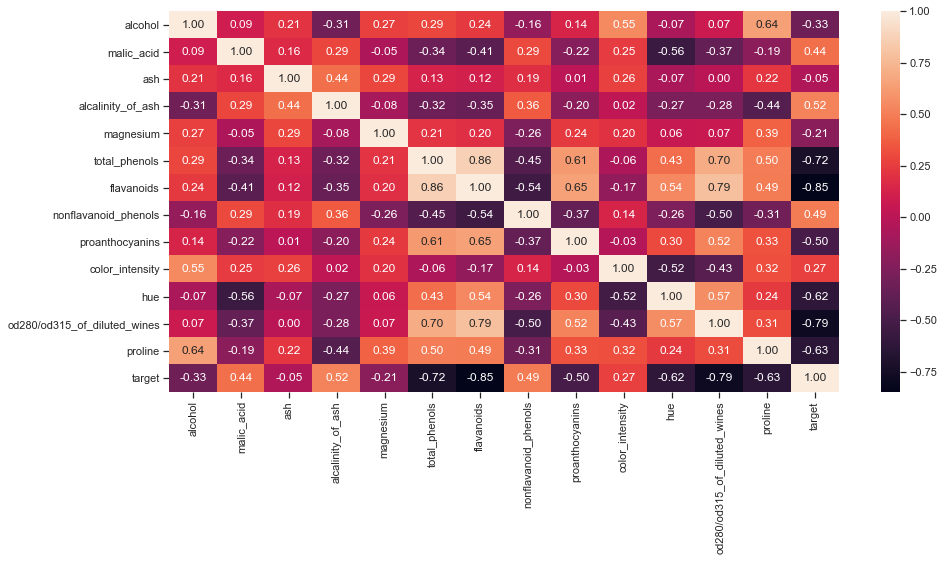

In [6]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

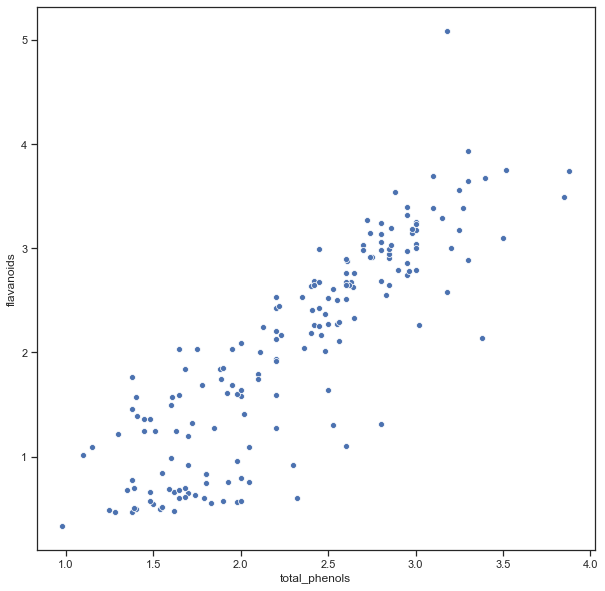

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='total_phenols', y='flavanoids', data=data)

Между признаком "total_phenols" и признаком "flavanoids" существует зависимость, близкая к линейной, коэффициент корреляции = 0,86

Попробуем восстановить данную линейную зависимость.

In [80]:
x = data['total_phenols'].values
y = data['flavanoids'].values

In [85]:
reg = BayesianRidge(fit_intercept=True).fit(x.reshape(-1, 1), y)
reg.coef_
reg.intercept_

-1.1315823825415343

In [86]:
def func(w, b, x):
    return w*x + b

In [87]:
x_t = list(range(0, 300, 5))
y_t = [func(reg.coef_[0], reg.intercept_, x) for x in x_t]
y_tt = reg.predict(x.reshape(-1, 1))

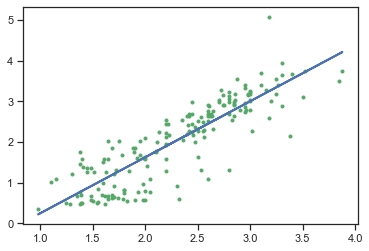

In [90]:
plt.plot(x, y, 'g.')
plt.plot(x, y_tt, 'b', linewidth=2.0)
plt.show()

### 4.2. Обучение SVM

In [42]:
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

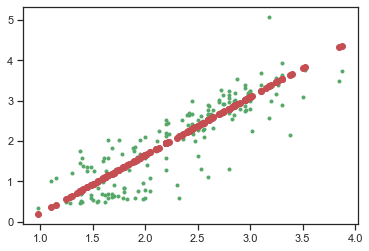

In [94]:
lin_SVR = LinearSVR(C=1.0, max_iter=10000)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))
plt.plot(x, y, 'g.')
plt.plot(x, predict, 'ro')

### 4.3. Обучение дерева решений

In [53]:
dec_tree = DecisionTreeRegressor(random_state=1, max_depth=5)
dec_tree.fit(data, data["flavanoids"])
dec_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [54]:
dec_predict = dec_tree.predict(data)

[Text(176.4675, 199.32, 'X[6] <= 1.93\nmse = 0.992\nsamples = 178\nvalue = 2.029'),
 Text(89.28, 163.07999999999998, 'X[6] <= 1.15\nmse = 0.209\nsamples = 79\nvalue = 1.063'),
 Text(44.64, 126.83999999999999, 'X[6] <= 0.725\nmse = 0.035\nsamples = 44\nvalue = 0.695'),
 Text(22.32, 90.6, 'X[6] <= 0.555\nmse = 0.007\nsamples = 28\nvalue = 0.577'),
 Text(11.16, 54.359999999999985, 'X[12] <= 442.5\nmse = 0.003\nsamples = 10\nvalue = 0.483'),
 Text(5.58, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 0.34'),
 Text(16.740000000000002, 18.119999999999976, 'mse = 0.001\nsamples = 9\nvalue = 0.499'),
 Text(33.480000000000004, 54.359999999999985, 'X[6] <= 0.64\nmse = 0.002\nsamples = 18\nvalue = 0.629'),
 Text(27.9, 18.119999999999976, 'mse = 0.0\nsamples = 10\nvalue = 0.591'),
 Text(39.06, 18.119999999999976, 'mse = 0.0\nsamples = 8\nvalue = 0.678'),
 Text(66.96000000000001, 90.6, 'X[6] <= 0.88\nmse = 0.015\nsamples = 16\nvalue = 0.902'),
 Text(55.8, 54.359999999999985, 'X[6] <= 0.79\nmse

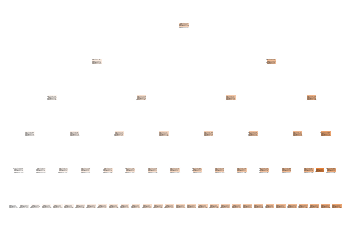

In [55]:
from sklearn import tree
tree.plot_tree(dec_tree, filled=True)

## 5. Оценка качества моделей

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 

print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  0.38837557197701433
Средняя квадратичная ошибка:  0.25054108150179827
Коэффициент детерминации:  0.7474673224538837


Метрики для SVM-модели:

Средняя абсолютная ошибка:  0.38178925184594825
Средняя квадратичная ошибка:  0.2543772448091098
Коэффициент детерминации:  0.7436006647956162


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.02370858666926083
Средняя квадратичная ошибка:  0.0010085943301392747
Коэффициент детерминации:  0.998983388172426


## 6. Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [60]:
from sklearn.model_selection import cross_validate

In [61]:
scoring = {'mean': 'neg_mean_absolute_error', 'square': 'neg_mean_squared_error', 'r2': 'r2'}

In [96]:
scores_regr = cross_validate(BayesianRidge(fit_intercept=True), 
                         x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_regr

{'fit_time': array([0.00102735, 0.00096703, 0.00151944]),
 'score_time': array([0.00098944, 0.00099707, 0.00098562]),
 'test_mean': array([-0.46738065, -0.43402138, -0.70598688]),
 'test_square': array([-0.27485104, -0.31021826, -0.68273128]),
 'test_r2': array([-0.10777762,  0.05992159,  0.10814324])}

In [97]:
scores_svm = cross_validate(LinearSVR(C=1.0, max_iter=10000), 
                         x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_svm

{'fit_time': array([0.00199437, 0.00099778, 0.00150585]),
 'score_time': array([0.00099707, 0.00099897, 0.0009973 ]),
 'test_mean': array([-0.37651991, -0.40821794, -0.73564537]),
 'test_square': array([-0.19049266, -0.2878672 , -0.74572873]),
 'test_r2': array([0.23222591, 0.12765374, 0.02584923])}

In [99]:
scores_dec = cross_validate(DecisionTreeRegressor(random_state=1, max_depth=3), 
                         data, data["flavanoids"], cv=5, scoring=scoring)
scores_dec

{'fit_time': array([0.00298786, 0.00349998, 0.00299144, 0.00199628, 0.00199485]),
 'score_time': array([0.00199771, 0.00250411, 0.00199318, 0.00199485, 0.00099635]),
 'test_mean': array([-0.19587302, -0.14458327, -0.1097615 , -0.13096384, -0.15244473]),
 'test_square': array([-0.06617504, -0.03283525, -0.01646075, -0.07348624, -0.03362549]),
 'test_r2': array([0.60597266, 0.94997735, 0.94259156, 0.92856868, 0.58323408])}

In [100]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_regr['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_regr['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_regr['test_r2']))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_svm['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_svm['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_svm['test_r2']))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_dec['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_dec['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_dec['test_r2']))

Метрики для линейной модели:

Средняя абсолютная ошибка:  -0.5357963043273647
Средняя квадратичная ошибка:  -0.4226001955008612
Коэффициент детерминации:  0.02009573828329725


Метрики для SVM-модели:

Средняя абсолютная ошибка:  -0.5067944091381511
Средняя квадратичная ошибка:  -0.4080295312633375
Коэффициент детерминации:  0.12857629245499136


Метрики для Decision Tree:

Средняя абсолютная ошибка:  -0.1467252733358278
Средняя квадратичная ошибка:  -0.044516553835920666
Коэффициент детерминации:  0.8020688669114537


## 7. Оптимизация модели с помощью решетчатого поиска

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [103]:
%%time
clf_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='r2')
clf_gs.fit(x.reshape(-1, 1), y)

Wall time: 44.5 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [104]:
# Лучшая модель
clf_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [105]:
clf_gs.best_score_

-0.9567860362862277

In [106]:
clf_gs.best_params_

{'max_depth': 3}

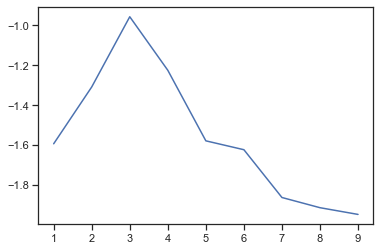

In [107]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Оптимизация SVM

In [108]:
param_grid = {'C': [0.1,1, 10, 100], 'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [109]:
grid = GridSearchCV(LinearSVR(),param_grid,refit=True,verbose=2)
grid.fit(x.reshape(-1, 1),y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ............................... C=0.1, epsilon=0.2, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib

d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conv

[CV] ................................ C=10, epsilon=0.3, total=   0.0s
[CV] C=10, epsilon=0.4 ...............................................
[CV] ................................ C=10, epsilon=0.4, total=   0.0s
[CV] C=10, epsilon=0.4 ...............................................
[CV] ................................ C=10, epsilon=0.4, total=   0.0s
[CV] C=10, epsilon=0.4 ...............................................
[CV] ................................ C=10, epsilon=0.4, total=   0.0s
[CV] C=10, epsilon=0.4 ...............................................
[CV] ................................ C=10, epsilon=0.4, total=   0.0s
[CV] C=10, epsilon=0.4 ...............................................
[CV] ................................ C=10, epsilon=0.4, total=   0.0s
[CV] C=10, epsilon=0.5 ...............................................
[CV] ................................ C=10, epsilon=0.5, total=   0.0s
[CV] C=10, epsilon=0.5 ...............................................
[CV] .

[CV] ............................... C=100, epsilon=0.5, total=   0.0s
[CV] C=100, epsilon=0.6 ..............................................
[CV] ............................... C=100, epsilon=0.6, total=   0.0s
[CV] C=100, epsilon=0.6 ..............................................
[CV] ............................... C=100, epsilon=0.6, total=   0.0s
[CV] C=100, epsilon=0.6 ..............................................
[CV] ............................... C=100, epsilon=0.6, total=   0.0s
[CV] C=100, epsilon=0.6 ..............................................
[CV] ............................... C=100, epsilon=0.6, total=   0.0s
[CV] C=100, epsilon=0.6 ..............................................
[CV] ............................... C=100, epsilon=0.6, total=   0.0s
[CV] C=100, epsilon=0.7 ..............................................
[CV] ............................... C=100, epsilon=0.7, total=   0.0s
[CV] C=100, epsilon=0.7 ..............................................
[CV] .

d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\документы\магистратура\2 семестр\ммо + пис\лабы\virtualenvs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conv

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                     0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [110]:
grid.best_estimator_

LinearSVR(C=100, dual=True, epsilon=0.7, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [111]:
grid.best_score_

-0.43105343219963677

In [112]:
grid.best_params_

{'C': 100, 'epsilon': 0.7}

In [113]:
parameters = {"alpha_1": np.logspace(-13,-5,10),
              "alpha_2": np.logspace(-9,-3,10),
              "lambda_1": np.logspace(-10,-5,10),
              "lambda_2": np.logspace(-11,-4,10)}

grid_regr = GridSearchCV(BayesianRidge(), parameters, cv=3, n_jobs=-1)
grid_regr.fit(x.reshape(-1, 1), y) 

GridSearchCV(cv=3, error_score=nan,
             estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                     alpha_init=None, compute_score=False,
                                     copy_X=True, fit_intercept=True,
                                     lambda_1=1e-06, lambda_2=1e-06,
                                     lambda_init=None, n_iter=300,
                                     normalize=False, tol=0.001,
                                     verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha_1': array([1.00000000e-13, 7.74263683e-13, 5.99484250e-...
                         'lambda_1': array([1.00000000e-10, 3.59381366e-10, 1.29154967e-09, 4.64158883e-09,
       1.66810054e-08, 5.99484250e-08, 2.15443469e-07, 7.74263683e-07,
       2.78255940e-06, 1.00000000e-05]),
                         'lambda_2': array([1.00000000e-11, 5.99484250e-11, 3.59381366e-10, 2.15443469e-09,
       1.29154967e-08, 7.74263683e-08

In [114]:
grid_regr.best_estimator_

BayesianRidge(alpha_1=1e-05, alpha_2=1e-09, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-10, lambda_2=0.0001, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [115]:
grid_regr.best_score_

0.020096691882994306

In [116]:
grid_regr.best_params_

{'alpha_1': 1e-05, 'alpha_2': 1e-09, 'lambda_1': 1e-10, 'lambda_2': 0.0001}

In [118]:
reg = BayesianRidge(fit_intercept=True, alpha_1=1e-05, alpha_2=1e-09, lambda_1=1e-10, lambda_2=0.0001).fit(x.reshape(-1, 1), y)
y_tt = reg.predict(x.reshape(-1, 1))

lin_SVR = LinearSVR(C=1.0, max_iter=10000, epsilon=1.0)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))

dec_tree = DecisionTreeRegressor(random_state=1, max_depth=3)
dec_tree.fit(data, data["flavanoids"])
dec_predict = dec_tree.predict(data)

In [119]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  0.38837555082790887
Средняя квадратичная ошибка:  0.250541080926183
Коэффициент детерминации:  0.7474673230340746


Метрики для SVM-модели:

Средняя абсолютная ошибка:  0.48790666940376964
Средняя квадратичная ошибка:  0.3272402021600858
Коэффициент детерминации:  0.6701585067132962


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.10946302125260202
Средняя квадратичная ошибка:  0.02407692877866564
Коэффициент детерминации:  0.9757316793911902


## После подбора параметров модели показали лучший результат, чем без подбора.